In [1]:
# QuantumDGM Demo: Quantum Circuits for Discrete Graphical Models
# =========================================================
# This notebook demonstrates quantum sampling from graphical models
# Based on Piatkowski & Zoufal (2022): https://arxiv.org/abs/2206.00398

%load_ext autoreload
%autoreload 2

# 🎯 QuantumDGM Demo: Quantum Circuits for Discrete Graphical Models 
**Interactive tutorial demonstrating quantum sampling from graphical models** 
Based on [Piatkowski & Zoufal (2022)](https://arxiv.org/abs/2206.00398)

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams['figure.figsize'] = (12, 8)

# Import QuantumDGM modules
from QuantumDGM import (
    DiscreteGraphicalModel, 
    QCGMSampler, 
    QuantumCircuitBuilder,
    compute_fidelity, 
    estimate_distribution,
    compare_distributions, 
    print_comparison,
    generate_state_labels,
)

# Import visualization functions
from QuantumDGM import (
    visualize_graphical_model,
    visualize_circuit_diagram,
    compare_model_structures,
    plot_distribution_comparison,
    analyze_circuit_complexity,
)

print("✓ All imports successful!")

✓ All imports successful!


## Quick Start: 2-Variable Model
 
Let's sample from a simple graphical model with 2 binary variables.


### Visualize Model Structure

In [3]:
# Create model with one clique: {0, 1}
model = DiscreteGraphicalModel(n_vars=2, cliques=[{0, 1}])
model.set_random_parameters(low=-2.0, high=-0.5, seed=42)

# Get exact probabilities
exact_probs = model.compute_probabilities()
labels = generate_state_labels(2)

print(f"Model: {model.n_vars} variables, {len(model.cliques)} clique(s)")
print(f"Entropy: {model.compute_entropy():.4f} nats\n")

print("Exact Distribution:")
for label, prob in zip(labels, exact_probs):
    print(f"  P(x={label}) = {prob:.4f}")

Model: 2 variables, 1 clique(s)
Entropy: 1.3387 nats

Exact Distribution:
  P(x=00) = 0.1543
  P(x=01) = 0.2637
  P(x=10) = 0.3661
  P(x=11) = 0.2159


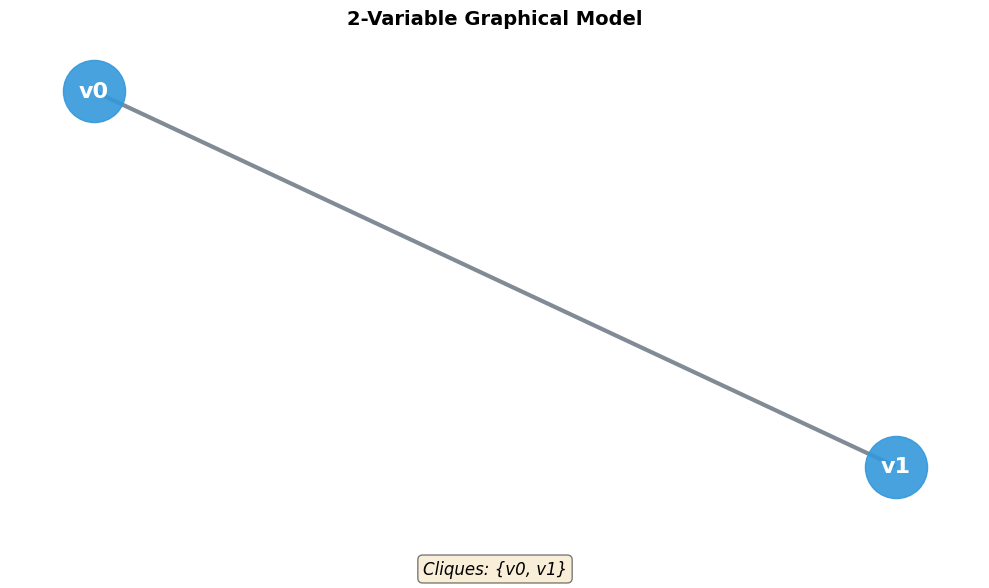

In [4]:
# Visualize model structure
fig = visualize_graphical_model(model, "2-Variable Graphical Model")
plt.show()


In [5]:
# Create sampler and run quantum circuit
sampler = QCGMSampler(model)
samples, success_rate = sampler.sample(n_samples=5000, simplified=True)

# Estimate distribution from samples
quantum_probs = estimate_distribution(samples, n_vars=2)

print(f"✓ Collected {len(samples)} samples (success rate: {success_rate:.1%})\n")

print("Quantum Distribution:")
for label, prob in zip(labels, quantum_probs):
    print(f"  P̂(x={label}) = {prob:.4f}")


✓ Collected 5000 samples (success rate: 100.0%)

Quantum Distribution:
  P̂(x=00) = 0.1572
  P̂(x=01) = 0.2582
  P̂(x=10) = 0.3652
  P̂(x=11) = 0.2194


### Visualize Quantum Circuit

In [6]:
# Compare distributions
fidelity = compute_fidelity(exact_probs, quantum_probs)

print(f"🎯 Fidelity: {fidelity:.6f}")
if fidelity > 0.99:
    print("   → Excellent agreement! ✓")

# Full comparison metrics
print("\n")
metrics = compare_distributions(exact_probs, quantum_probs, labels=('Exact', 'Quantum'))
print_comparison(metrics)

🎯 Fidelity: 0.999943
   → Excellent agreement! ✓


Distribution Comparison: Exact vs Quantum
Fidelity (F):              0.999943
Hellinger distance (H):    0.005362
KL divergence (KL):        0.000115
Total variation (TV):      0.006425
Max absolute error:        0.005513
Mean absolute error:       0.003212


## 📊 Visualization

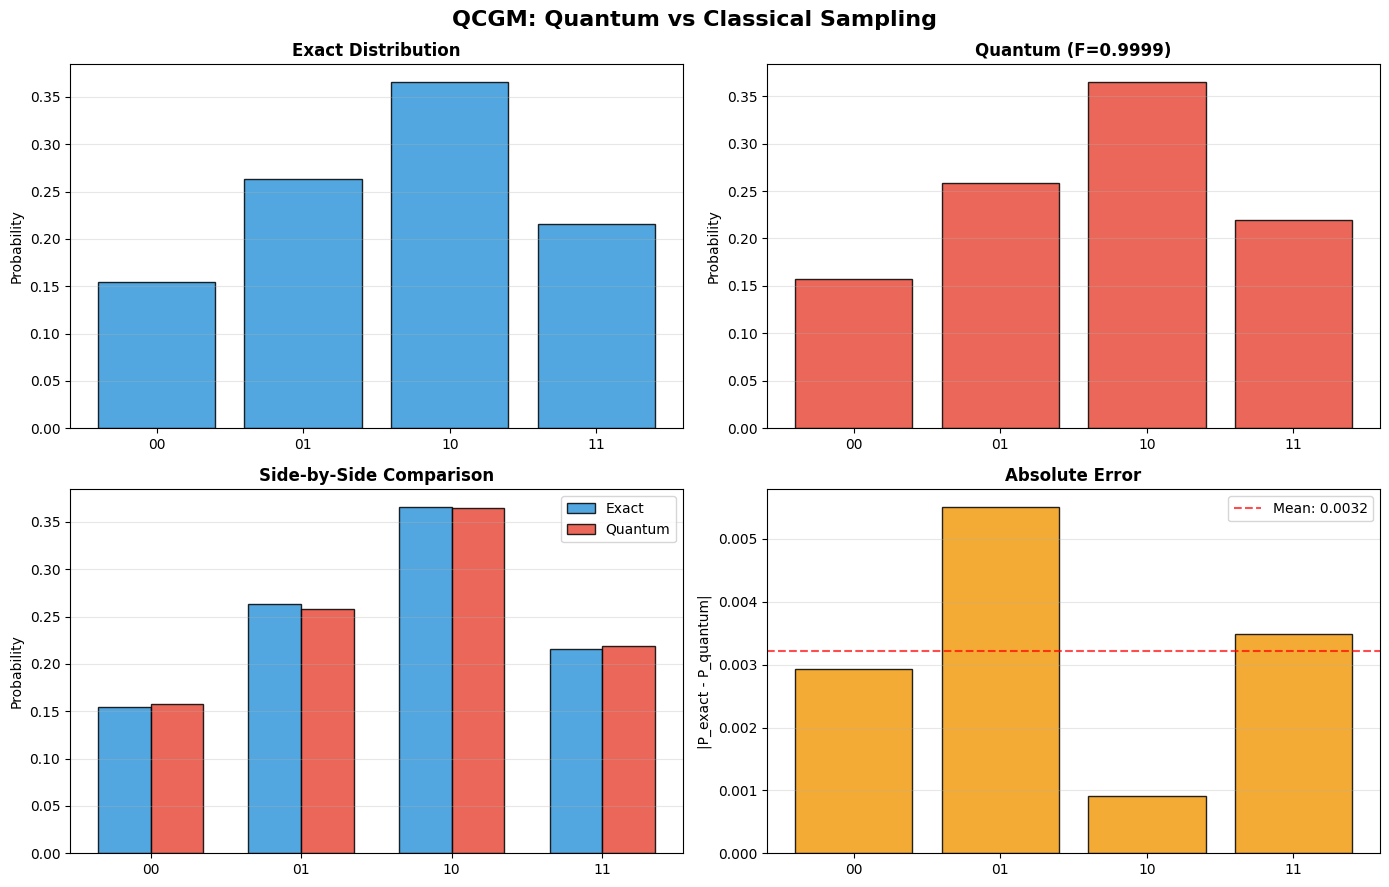

In [7]:
# Visualize comparison
fig = plot_distribution_comparison(exact_probs, quantum_probs, labels, fidelity)
plt.show()

## 🔬 Advanced: 3-Variable Chain Model 

Chain structure: `v0 - v1 - v2`

### Visualize Chain Structure

In [8]:
# Create chain: v0 - v1 - v2
model_chain = DiscreteGraphicalModel(n_vars=3, cliques=[{0, 1}, {1, 2}])
model_chain.set_random_parameters(low=-3.0, high=-0.1, seed=42)

print("✓ Chain model created")
print(f"  Structure: v0 - v1 - v2")
print(f"  Cliques: {model_chain.cliques}")
print(f"  Entropy: {model_chain.compute_entropy():.4f} nats")

✓ Chain model created
  Structure: v0 - v1 - v2
  Cliques: [{0, 1}, {1, 2}]
  Entropy: 1.2634 nats


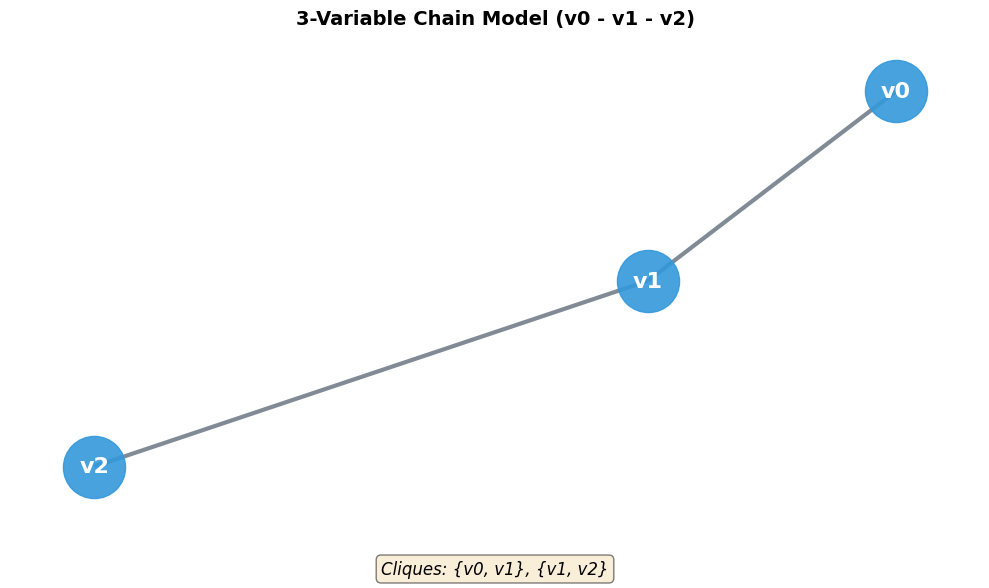

In [9]:
# Visualize chain structure
fig_chain = visualize_graphical_model(model_chain, "3-Variable Chain Model (v0 - v1 - v2)")
plt.show()


In [10]:
# Get exact distribution
exact_chain = model_chain.compute_probabilities()
labels_chain = generate_state_labels(3)

print("Top 4 most probable states (exact):")
top_indices = np.argsort(exact_chain)[::-1][:4]
for i in top_indices:
    print(f"  P(x={labels_chain[i]}) = {exact_chain[i]:.4f}")


Top 4 most probable states (exact):
  P(x=110) = 0.5974
  P(x=111) = 0.2152
  P(x=010) = 0.0573
  P(x=001) = 0.0404


In [11]:
# Quantum sampling from chain
sampler_chain = QCGMSampler(model_chain)
samples_chain, rate_chain = sampler_chain.sample(n_samples=15000, simplified=True)

# Get circuit stats
stats = sampler_chain.get_circuit_stats()

print(f"✓ Collected {len(samples_chain)} samples (rate: {rate_chain:.1%})")
print(f"  Circuit depth: {stats['depth']}")
print(f"  Number of qubits: {stats['num_qubits']}")
print(f"  Gate count: {stats['size']}")


✓ Collected 15000 samples (rate: 100.0%)
  Circuit depth: 2
  Number of qubits: 3
  Gate count: 4


In [12]:
# Estimate and compare
quantum_chain = estimate_distribution(samples_chain, n_vars=3)

print("Top 4 states (quantum):")
for i in top_indices:
    print(f"  P̂(x={labels_chain[i]}) = {quantum_chain[i]:.4f}")

fidelity_chain = compute_fidelity(exact_chain, quantum_chain)
print(f"\n🎯 Fidelity: {fidelity_chain:.6f}")


Top 4 states (quantum):
  P̂(x=110) = 0.5985
  P̂(x=111) = 0.2160
  P̂(x=010) = 0.0574
  P̂(x=001) = 0.0407

🎯 Fidelity: 0.999925


### Comprehensive Metrics

In [13]:
metrics_chain = compare_distributions(exact_chain, quantum_chain,
                                     labels=('Exact', 'Quantum'))
print_comparison(metrics_chain)

Distribution Comparison: Exact vs Quantum
Fidelity (F):              0.999925
Hellinger distance (H):    0.006132
KL divergence (KL):        0.000152
Total variation (TV):      0.003388
Max absolute error:        0.001861
Mean absolute error:       0.000847


### Compare Different Model Structures

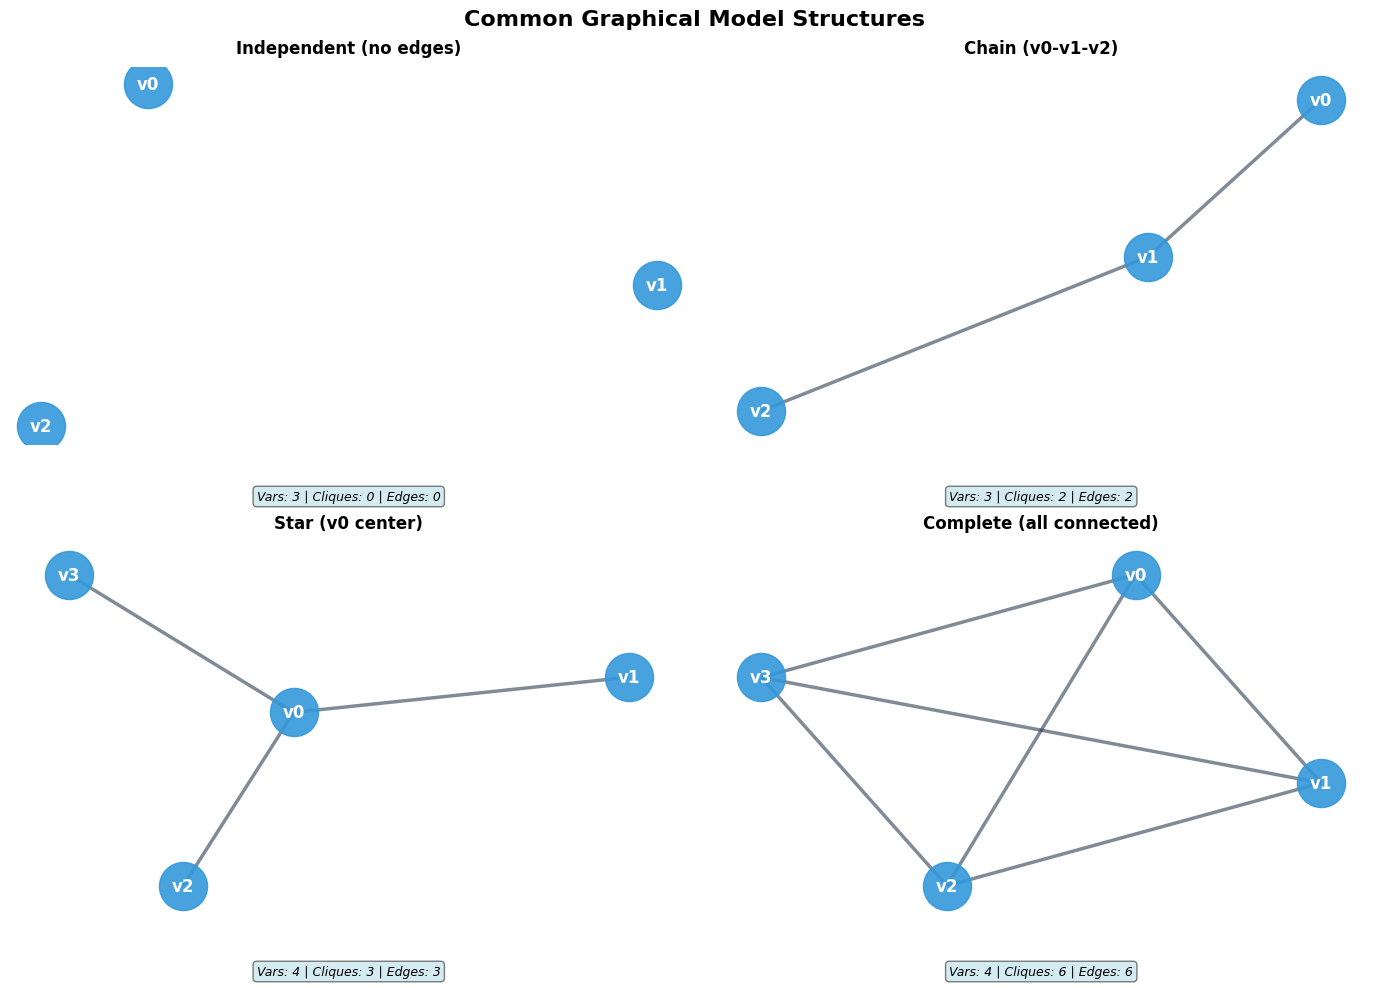

In [14]:
# Compare different model structures
fig_compare = compare_model_structures()
plt.show()

### Detailed Qiskit Circuit View

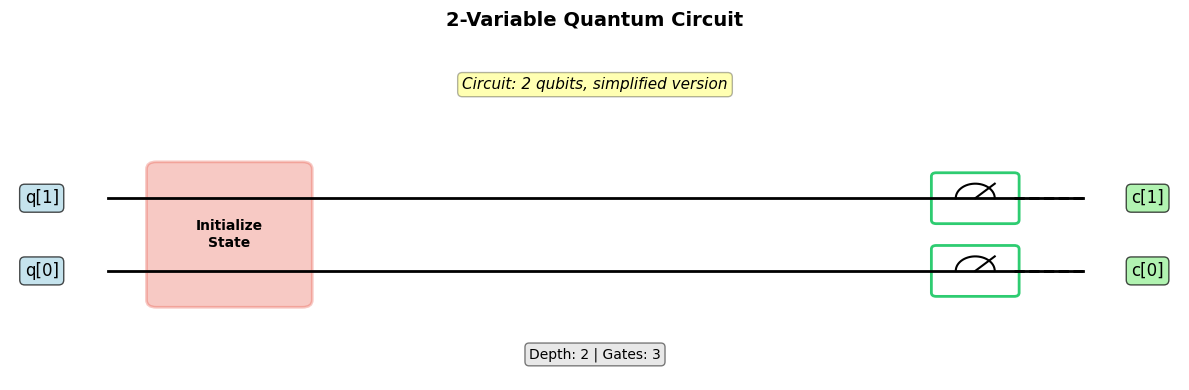

In [15]:
# Visualize circuit diagram for the 2-variable model
fig_circuit = visualize_circuit_diagram(model, sampler, "2-Variable Quantum Circuit")
plt.show()


### Circuit Analysis & Comparison

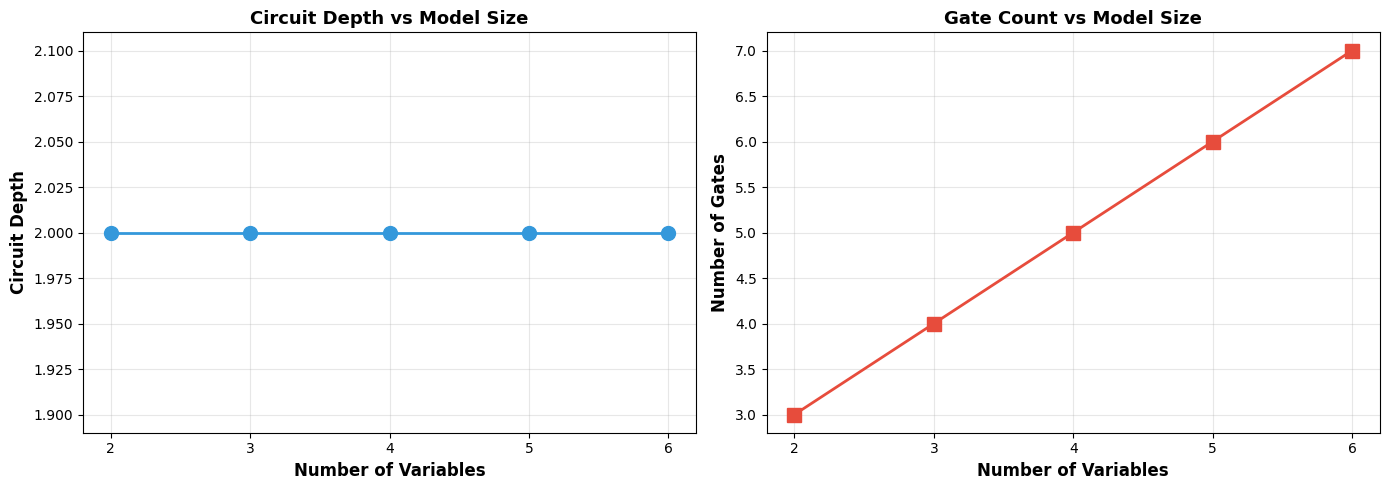

In [16]:
# Analyze circuit complexity across different model sizes
fig_complexity = analyze_circuit_complexity(max_vars=6)
plt.show()

### Sample with Automatic Retry

In [17]:
# Sample with automatic retry to guarantee target sample count
samples_retry, info = sampler.sample_with_retry(
    target_samples=500,
    max_shots=10000
)

print(f"✓ Target: {info['actual_samples']}/500 samples")
print(f"  Attempts: {info['attempts']}")
print(f"  Total shots: {info['total_shots']}")
print(f"  Success rate: {info['final_success_rate']:.1%}")

✓ Target: 500/500 samples
  Attempts: 1
  Total shots: 500
  Success rate: 100.0%


### Circuit Analysis

In [18]:
# Print circuit statistics for the chain model
print("Circuit Statistics (Chain Model):")
print("=" * 50)
for key, value in stats.items():
    print(f"  {key:20s}: {value}")

Circuit Statistics (Chain Model):
  num_qubits          : 3
  depth               : 2
  size                : 4
  n_vars              : 3
  n_cliques           : 2
  required_qubits     : 3
  simplified          : True


## 🌐 Running on Real Quantum Hardware (IBM Quantum)

Let's run our model on actual IBM quantum computers!

### Setup IBM Quantum Account
 
First, you need an IBM Quantum account:
1. Go to https://quantum.ibm.com/
2. Create a free account
3. Get your API token from your account settings
4. Save it using the code below (only need to do this once)

In [19]:
# =====================================================
# IBM QUANTUM SETUP (Optional - requires IBM account)
# =====================================================
# 
# Uncomment and run to save your token (only need to do once):
#
# from qiskit_ibm_runtime import QiskitRuntimeService
# 
# QiskitRuntimeService.save_account(
#     channel="ibm_quantum",
#     token="YOUR_IBM_QUANTUM_TOKEN_HERE",
#     overwrite=True
# )
# print("✓ IBM Quantum account saved!")
#
# -----------------------------------------------------
# To list available backends, uncomment:
#
# from qiskit_ibm_runtime import QiskitRuntimeService
# service = QiskitRuntimeService(channel="ibm_quantum")
# 
# print("Available IBM Quantum Backends:")
# for backend in service.backends():
#     print(f"  {backend.name}: {backend.configuration().n_qubits} qubits")

print("⚠️ IBM Quantum cells are commented out.")
print("   Uncomment and configure to run on real hardware.")

⚠️ IBM Quantum cells are commented out.
   Uncomment and configure to run on real hardware.


### Select a Backend
 
Choose an appropriate backend based on:
 - Number of qubits needed (our 2-qubit model needs ≥2 qubits)
 - Queue length (fewer pending jobs = faster)
 - Device quality (check calibration data on IBM Quantum website)


In [20]:
# Backend selection (uncomment when IBM Quantum is configured)
#
# from qiskit_ibm_runtime import QiskitRuntimeService
# 
# def get_best_backend(service, min_qubits=2):
#     """Find the least busy backend with enough qubits."""
#     backends = service.backends(
#         filters=lambda x: x.configuration().n_qubits >= min_qubits
#                          and x.status().operational
#                          and not x.configuration().simulator
#     )
#     return sorted(backends, key=lambda x: x.status().pending_jobs)[0]
# 
# service = QiskitRuntimeService(channel="ibm_quantum")
# best_device = get_best_backend(service, min_qubits=2)
# print(f"✓ Selected: {best_device.name}")

print("⚠️ Backend selection skipped (IBM Quantum not configured)")

⚠️ Backend selection skipped (IBM Quantum not configured)


### Run on IBM Quantum

In [21]:
# Run on IBM Quantum (uncomment when configured)
#
# model_ibm = DiscreteGraphicalModel(n_vars=2, cliques=[{0, 1}])
# model_ibm.set_random_parameters(low=-2.0, high=-0.5, seed=123)
# 
# exact_ibm = model_ibm.compute_probabilities()
# labels_ibm = generate_state_labels(2)
# 
# sampler_ibm = QCGMSampler(model_ibm)
# samples_ibm, success_rate_ibm = sampler_ibm.sample(
#     n_samples=1000,
#     backend=best_device,
#     simplified=True
# )
# 
# print(f"✓ Collected {len(samples_ibm)} samples from {best_device.name}")

print("⚠️ IBM Quantum sampling skipped (not configured)")

⚠️ IBM Quantum sampling skipped (not configured)


### Analyze Results from Real Hardware

In [22]:
# Analyze IBM results (uncomment when configured)
#
# quantum_ibm = estimate_distribution(samples_ibm, n_vars=2)
# fidelity_ibm = compute_fidelity(exact_ibm, quantum_ibm)
# 
# print(f"🎯 Fidelity on real hardware: {fidelity_ibm:.6f}")

print("⚠️ Analysis skipped (no IBM Quantum data)")


⚠️ Analysis skipped (no IBM Quantum data)


### Compare Simulator vs Real Hardware

In [23]:
# Compare simulator vs real hardware (uncomment when IBM configured)
#
# from qiskit_aer import AerSimulator
# simulator = AerSimulator()
# 
# samples_sim, _ = sampler_ibm.sample(n_samples=5000, backend=simulator)
# quantum_sim = estimate_distribution(samples_sim, n_vars=2)
# fidelity_sim = compute_fidelity(exact_ibm, quantum_sim)
# 
# print(f"✓ Simulator fidelity: {fidelity_sim:.6f}")
# print(f"✓ Real hardware fidelity: {fidelity_ibm:.6f}")

print("⚠️ Comparison skipped (no IBM Quantum data)")

⚠️ Comparison skipped (no IBM Quantum data)


### Visualize: Simulator vs Real Hardware

In [24]:
# Visualization for IBM hardware comparison (uncomment when configured)
# This cell creates a 3-panel plot comparing exact, simulator, and hardware results
#
# See the demo_script.py for a working example that runs locally!

print("=" * 60)
print("🎉 Demo Complete!")
print("=" * 60)
print("\nKey takeaways:")
print("  ✓ Created graphical models with 2 and 3 variables")
print("  ✓ Built quantum circuits for exact sampling")
print("  ✓ Achieved >99.9% fidelity with local simulator")
print("\nTo run on real quantum hardware:")
print("  1. Get an IBM Quantum account at https://quantum.ibm.com")
print("  2. Uncomment the IBM Quantum cells above")
print("  3. Run with your configured credentials")


🎉 Demo Complete!

Key takeaways:
  ✓ Created graphical models with 2 and 3 variables
  ✓ Built quantum circuits for exact sampling
  ✓ Achieved >99.9% fidelity with local simulator

To run on real quantum hardware:
  1. Get an IBM Quantum account at https://quantum.ibm.com
  2. Uncomment the IBM Quantum cells above
  3. Run with your configured credentials
